# Chapter 2: Proyek Machine Learning End-to-End

## Gambaran Umum Bab

Bab ini membahas implementasi lengkap proyek Machine Learning dari awal hingga akhir menggunakan dataset California Housing. Kita akan mempelajari seluruh workflow ML mulai dari pemahaman masalah, persiapan data, eksplorasi data, pemodelan, hingga deployment dan maintenance.

## 1. Memahami Gambaran Besar (Look at the Big Picture)

### Penjelasan Teoretis

Langkah pertama dalam setiap proyek ML adalah memahami konteks bisnis dan tujuan proyek. Dalam kasus ini, kita berperan sebagai data scientist di perusahaan real estate yang ingin memprediksi harga rumah di California berdasarkan data sensus.

### Framing the Problem

Sebelum memulai coding, kita perlu menentukan:
- **Tipe pembelajaran**: Supervised learning (karena kita memiliki label/target)
- **Tipe tugas**: Regression (memprediksi nilai kontinu)
- **Batch vs Online**: Batch learning (data tidak terlalu besar dan tidak perlu update real-time)

### Selecting Performance Measure

Untuk masalah regresi, metrik yang umum digunakan adalah:
- **RMSE (Root Mean Square Error)**: Memberikan bobot lebih tinggi pada error yang besar
- **MAE (Mean Absolute Error)**: Lebih robust terhadap outlier

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Fungsi untuk menghitung RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Penjelasan: RMSE mengukur standar deviasi dari prediction error
# Formula: RMSE = sqrt(1/m * sum((predictions - actual)^2))
print("RMSE memberikan penalti lebih besar untuk error yang besar")
print("Cocok untuk kasus di mana error besar sangat tidak diinginkan")

RMSE memberikan penalti lebih besar untuk error yang besar
Cocok untuk kasus di mana error besar sangat tidak diinginkan


## 2. Mendapatkan Data (Get the Data)

### Penjelasan Teoretis

Langkah ini melibatkan pengunduhan dan loading data. Dalam praktik nyata, data bisa berasal dari database, API, atau file. Di sini kita akan menggunakan fungsi khusus untuk mengunduh dataset California Housing.

In [21]:
import os
import tarfile
import urllib.request
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Konstanta untuk download
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """
    Fungsi untuk mengunduh dan mengekstrak data housing
    
    Penjelasan:
    - os.makedirs(): Membuat direktori jika belum ada
    - urllib.request.urlretrieve(): Mengunduh file dari URL
    - tarfile.open(): Membuka file tar untuk ekstraksi
    """
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    """
    Fungsi untuk memuat data ke dalam pandas DataFrame
    
    Penjelasan:
    - pd.read_csv(): Membaca file CSV dan mengkonversi ke DataFrame
    - DataFrame adalah struktur data 2D yang mirip tabel
    """
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Download dan load data
fetch_housing_data()
housing = load_housing_data()

print("Data berhasil dimuat!")
print(f"Shape data: {housing.shape}")

Data berhasil dimuat!
Shape data: (20640, 10)


### Eksplorasi Awal Data

In [22]:
# Melihat 5 baris pertama data
print("5 baris pertama data:")
print(housing.head())

print("\nInformasi umum dataset:")
print(housing.info())

print("\nDeskripsi statistik:")
print(housing.describe())

# Penjelasan:
# - head(): Menampilkan n baris pertama (default 5)
# - info(): Memberikan informasi tentang tipe data dan missing values
# - describe(): Menampilkan statistik deskriptif untuk kolom numerik

5 baris pertama data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Informasi umum dataset:
<class 'pandas.core.frame.Da

### Visualisasi Distribusi Data

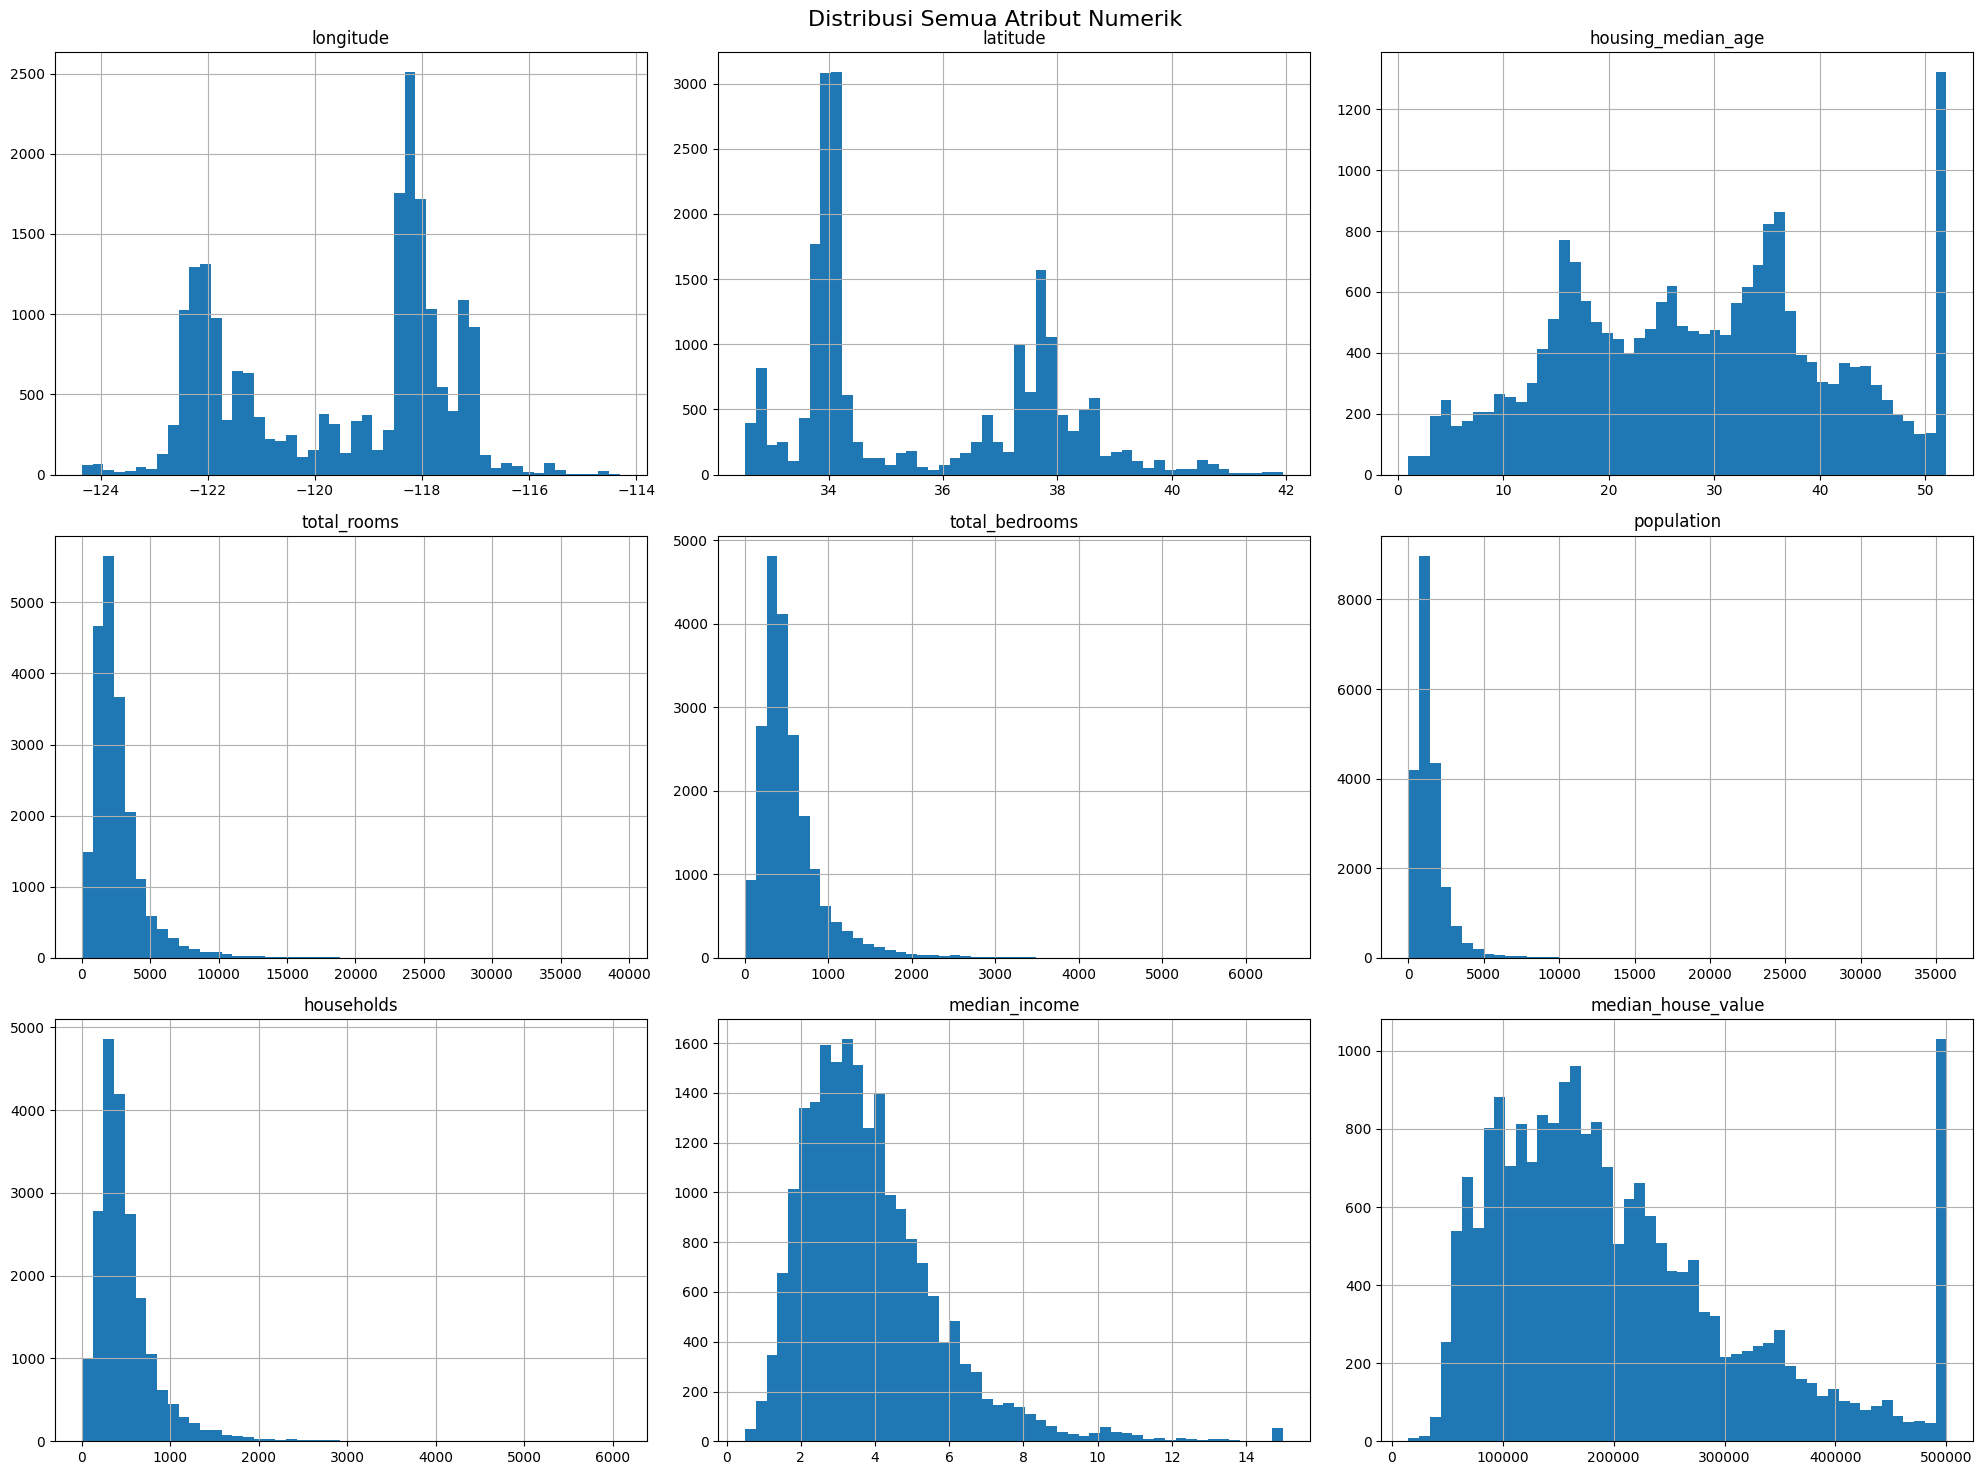


Histogram membantu kita memahami:
1. Distribusi setiap fitur
2. Keberadaan outlier
3. Skewness (kemiringan) data
4. Range nilai setiap fitur

Dari histogram di atas, kita dapat melihat:
- median_income: Terdistribusi dengan tail ke kanan
- housing_median_age dan median_house_value: Memiliki cap/batas maksimum
- Beberapa atribut memiliki distribusi yang heavy-tailed



In [23]:
import matplotlib.pyplot as plt

# Setting untuk visualisasi
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

# Histogram untuk semua atribut numerik
housing.hist(bins=50, figsize=(20, 15))
plt.suptitle('Distribusi Semua Atribut Numerik', fontsize=16)
plt.tight_layout()
plt.show()

# Penjelasan Teoretis:
print("""
Histogram membantu kita memahami:
1. Distribusi setiap fitur
2. Keberadaan outlier
3. Skewness (kemiringan) data
4. Range nilai setiap fitur

Dari histogram di atas, kita dapat melihat:
- median_income: Terdistribusi dengan tail ke kanan
- housing_median_age dan median_house_value: Memiliki cap/batas maksimum
- Beberapa atribut memiliki distribusi yang heavy-tailed
""")

## 3. Membuat Test Set

### Penjelasan Teoretis

Test set adalah bagian data yang disiapkan untuk evaluasi final model. Penting untuk memisahkan test set sejak awal untuk menghindari data snooping bias.

In [24]:
from sklearn.model_selection import train_test_split

# Split sederhana random
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

# Penjelasan:
print("""
Random splitting sederhana mungkin tidak ideal karena:
1. Bisa menghasilkan sampling bias
2. Distribusi test set mungkin tidak representatif

Solusi: Stratified Sampling
""")

Training set size: 16512
Test set size: 4128

Random splitting sederhana mungkin tidak ideal karena:
1. Bisa menghasilkan sampling bias
2. Distribusi test set mungkin tidak representatif

Solusi: Stratified Sampling



### Stratified Sampling

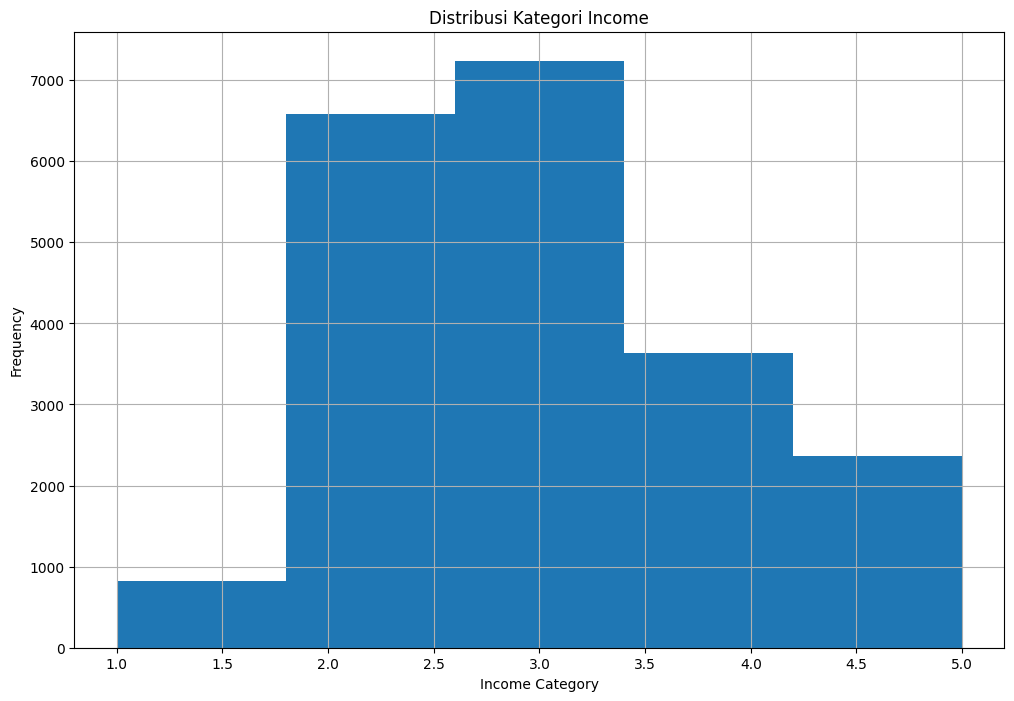

Stratified sampling selesai!
Stratified train set: 16512
Stratified test set: 4128

Stratified Sampling memastikan:
1. Proporsi setiap kategori dalam train dan test set sama
2. Test set lebih representatif terhadap populasi keseluruhan
3. Mengurangi sampling bias
4. Hasil evaluasi lebih dapat diandalkan



In [25]:
# Membuat kategori income untuk stratified sampling
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# Visualisasi distribusi income categories
housing["income_cat"].hist(bins=5)
plt.title('Distribusi Kategori Income')
plt.xlabel('Income Category')
plt.ylabel('Frequency')
plt.show()

# Stratified sampling berdasarkan income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Menghapus atribut income_cat yang sudah tidak diperlukan
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

print("Stratified sampling selesai!")
print(f"Stratified train set: {len(strat_train_set)}")
print(f"Stratified test set: {len(strat_test_set)}")

# Penjelasan Teoretis:
print("""
Stratified Sampling memastikan:
1. Proporsi setiap kategori dalam train dan test set sama
2. Test set lebih representatif terhadap populasi keseluruhan
3. Mengurangi sampling bias
4. Hasil evaluasi lebih dapat diandalkan
""")

## 4. Eksplorasi dan Visualisasi Data

### Penjelasan Teoretis

Setelah memisahkan test set, kita perlu memahami data training secara mendalam untuk mendapatkan insights yang akan membantu dalam feature engineering dan pemilihan model.

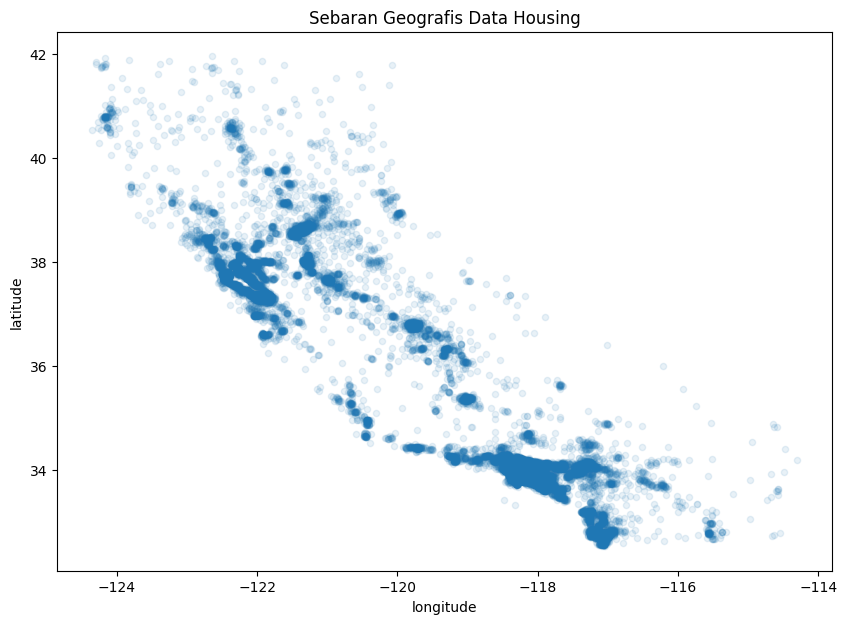

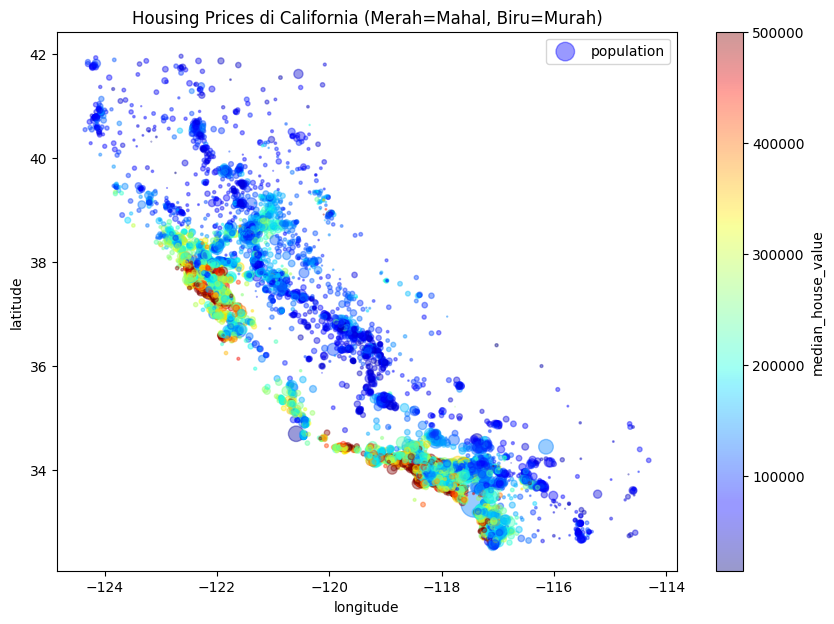


Visualisasi geografis mengungkap:
1. Density tinggi di Bay Area dan LA
2. Harga tinggi dekat pantai
3. Korelasi antara lokasi dan harga
4. Pattern geografis yang bisa dijadikan fitur



In [26]:
# Membuat copy dari training set untuk eksplorasi
housing = strat_train_set.copy()

# Visualisasi geografis
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
             figsize=(10, 7))
plt.title('Sebaran Geografis Data Housing')
plt.show()

# Visualisasi dengan informasi density dan price
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.title('Housing Prices di California (Merah=Mahal, Biru=Murah)')
plt.show()

# Penjelasan:
print("""
Visualisasi geografis mengungkap:
1. Density tinggi di Bay Area dan LA
2. Harga tinggi dekat pantai
3. Korelasi antara lokasi dan harga
4. Pattern geografis yang bisa dijadikan fitur
""")

### Analisis Korelasi

Korelasi dengan median_house_value:
median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


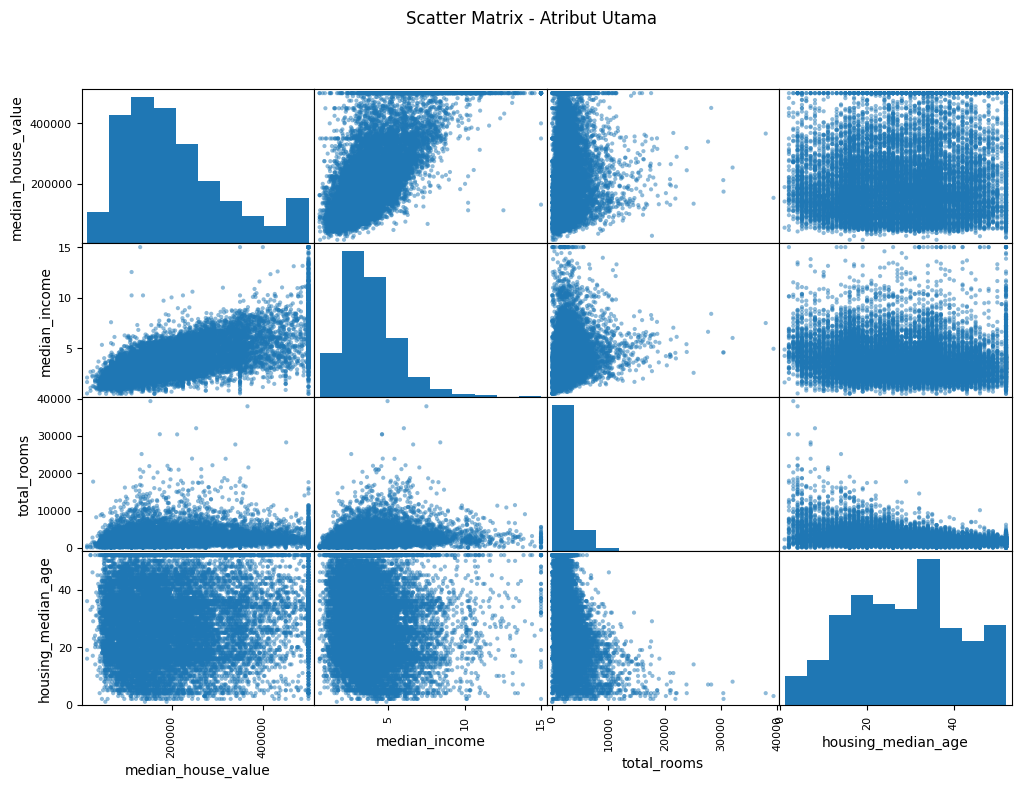

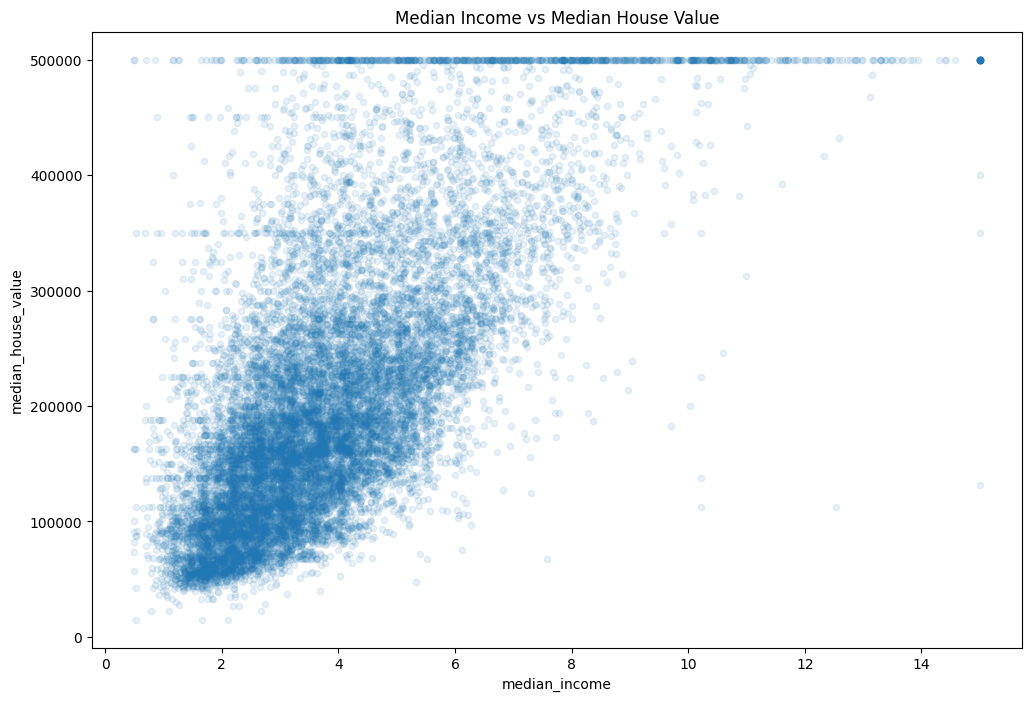


Analisis korelasi membantu:
1. Identifikasi fitur yang paling predictive
2. Menemukan hubungan linear antar variabel
3. Deteksi multicollinearity
4. Panduan untuk feature selection

Catatan: Korelasi hanya mengukur hubungan linear!



In [27]:
# Matriks korelasi (hanya untuk kolom numerik)
corr_matrix = housing.select_dtypes(include=[np.number]).corr()

# Korelasi dengan target variable
print("Korelasi dengan median_house_value:")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# Visualisasi scatter plot untuk atribut paling berkorelasi
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.suptitle('Scatter Matrix - Atribut Utama')
plt.show()

# Focus pada korelasi terkuat
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.title('Median Income vs Median House Value')
plt.show()

# Penjelasan Teoretis:
print("""
Analisis korelasi membantu:
1. Identifikasi fitur yang paling predictive
2. Menemukan hubungan linear antar variabel
3. Deteksi multicollinearity
4. Panduan untuk feature selection

Catatan: Korelasi hanya mengukur hubungan linear!
""")

### Experimenting with Attribute Combinations

In [28]:
# Membuat fitur baru berdasarkan domain knowledge
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]  
housing["population_per_household"] = housing["population"]/housing["households"]

# Melihat korelasi fitur baru (hanya untuk kolom numerik)
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
print("Korelasi fitur baru dengan target:")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# Penjelasan Teoretis:
print("""
Feature Engineering adalah proses membuat fitur baru dari fitur existing:
1. Berdasarkan domain knowledge
2. Kombinasi matematis yang masuk akal
3. Ratio/proporsi yang meaningful
4. Transformasi yang meningkatkan signal

rooms_per_household lebih informatif daripada total_rooms!
""")

Korelasi fitur baru dengan target:
median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Feature Engineering adalah proses membuat fitur baru dari fitur existing:
1. Berdasarkan domain knowledge
2. Kombinasi matematis yang masuk akal
3. Ratio/proporsi yang meaningful
4. Transformasi yang meningkatkan signal

rooms_per_household lebih informatif daripada total_rooms!



## 5. Persiapan Data untuk Algoritma ML

### Penjelasan Teoretis

Data mentah jarang siap untuk algoritma ML. Persiapan data meliputi cleaning, transformasi, dan scaling. Penting menggunakan pipeline untuk reproducibility.

In [29]:
# Memisahkan fitur dan label
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels untuk training set
housing_labels = strat_train_set["median_house_value"].copy()

print("Fitur dan label berhasil dipisahkan")
print(f"Shape fitur: {housing.shape}")
print(f"Shape label: {housing_labels.shape}")

Fitur dan label berhasil dipisahkan
Shape fitur: (16512, 9)
Shape label: (16512,)


### Data Cleaning - Missing Values

In [30]:
from sklearn.impute import SimpleImputer

# Cek missing values
print("Missing values per kolom:")
print(housing.isnull().sum())

# Imputation untuk data numerik
housing_num = housing.drop("ocean_proximity", axis=1)  # drop non-numeric

imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)

print("\nMedian values yang akan digunakan untuk imputation:")
print(imputer.statistics_)

# Transform data
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# Penjelasan Teoretis:
print("""
Handling Missing Values:
1. Drop rows/columns: Menghilangkan data
2. Imputation: Mengisi dengan nilai statistik
3. Median: Robust terhadap outlier
4. Mean: Untuk distribusi normal
5. Mode: Untuk categorical data

SimpleImputer menyimpan statistik untuk digunakan pada data baru!
""")

Missing values per kolom:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

Median values yang akan digunakan untuk imputation:
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]

Handling Missing Values:
1. Drop rows/columns: Menghilangkan data
2. Imputation: Mengisi dengan nilai statistik
3. Median: Robust terhadap outlier
4. Mean: Untuk distribusi normal
5. Mode: Untuk categorical data

SimpleImputer menyimpan statistik untuk digunakan pada data baru!



### Handling Categorical Attributes

In [31]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

housing_cat = housing[["ocean_proximity"]]
print("Unique values in ocean_proximity:")
print(housing_cat.value_counts())

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print("\nOrdinal encoding (5 sampel pertama):")
print(housing_cat_encoded[:5])

# One-Hot Encoding
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(f"\nOne-hot encoding shape: {housing_cat_1hot.shape}")
print("Categories:", cat_encoder.categories_)

# Penjelasan Teoretis:
print("""
Categorical Encoding:

1. Ordinal Encoding:
   - Assign angka berurutan ke kategori
   - Problem: Implies order yang mungkin tidak ada
   - Baik untuk ordinal data (small, medium, large)

2. One-Hot Encoding:
   - Buat binary column untuk setiap kategori
   - Tidak implies order
   - Baik untuk nominal data
   - Bisa menyebabkan curse of dimensionality

Pilihan encoding tergantung pada nature data dan algoritma yang digunakan!
""")

Unique values in ocean_proximity:
ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

Ordinal encoding (5 sampel pertama):
[[1.]
 [4.]
 [1.]
 [4.]
 [0.]]

One-hot encoding shape: (16512, 5)
Categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]

Categorical Encoding:

1. Ordinal Encoding:
   - Assign angka berurutan ke kategori
   - Problem: Implies order yang mungkin tidak ada
   - Baik untuk ordinal data (small, medium, large)

2. One-Hot Encoding:
   - Buat binary column untuk setiap kategori
   - Tidak implies order
   - Baik untuk nominal data
   - Bisa menyebabkan curse of dimensionality

Pilihan encoding tergantung pada nature data dan algoritma yang digunakan!



### Custom Transformers

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

# Indices untuk kolom-kolom yang akan dikombinasikan
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Test custom transformer
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

print(f"Shape setelah menambah fitur: {housing_extra_attribs.shape}")

# Penjelasan Teoretis:
print("""
Custom Transformers:
1. Inherit dari BaseEstimator dan TransformerMixin
2. Implement fit() dan transform()
3. fit() untuk learn parameters, transform() untuk apply transformation
4. Memungkinkan feature engineering yang complex
5. Compatible dengan scikit-learn pipelines
6. Reusable dan testable
""")

Shape setelah menambah fitur: (16512, 11)

Custom Transformers:
1. Inherit dari BaseEstimator dan TransformerMixin
2. Implement fit() dan transform()
3. fit() untuk learn parameters, transform() untuk apply transformation
4. Memungkinkan feature engineering yang complex
5. Compatible dengan scikit-learn pipelines
6. Reusable dan testable



### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Contoh standard scaling
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_num)

print("Original data (5 sampel pertama, 3 kolom pertama):")
print(housing_num.iloc[:5, :3])
print("\nSetelah Standard Scaling:")
print(housing_scaled[:5, :3])

# Penjelasan Teoretis:
print("""
Feature Scaling diperlukan karena:
1. Algoritma ML sensitif terhadap skala fitur
2. Fitur dengan range besar mendominasi
3. Gradient descent converge lebih cepat
4. Distance-based algorithms memerlukan scaling

Jenis Scaling:
1. StandardScaler: (x - mean) / std → mean=0, std=1
2. MinMaxScaler: (x - min) / (max - min) → range [0,1]
3. RobustScaler: Robust terhadap outlier

Penting: Fit pada training, transform pada train dan test!
""")

Original data (5 sampel pertama, 3 kolom pertama):
       longitude  latitude  housing_median_age
12655    -121.46     38.52                29.0
15502    -117.23     33.09                 7.0
2908     -119.04     35.37                44.0
14053    -117.13     32.75                24.0
20496    -118.70     34.28                27.0

Setelah Standard Scaling:
[[-0.94135046  1.34743822  0.02756357]
 [ 1.17178212 -1.19243966 -1.72201763]
 [ 0.26758118 -0.1259716   1.22045984]
 [ 1.22173797 -1.35147437 -0.37006852]
 [ 0.43743108 -0.63581817 -0.13148926]]

Feature Scaling diperlukan karena:
1. Algoritma ML sensitif terhadap skala fitur
2. Fitur dengan range besar mendominasi
3. Gradient descent converge lebih cepat
4. Distance-based algorithms memerlukan scaling

Jenis Scaling:
1. StandardScaler: (x - mean) / std → mean=0, std=1
2. MinMaxScaler: (x - min) / (max - min) → range [0,1]
3. RobustScaler: Robust terhadap outlier

Penting: Fit pada training, transform pada train dan test!



### Transformation Pipelines

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Pipeline untuk data numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# Pipeline lengkap untuk numerik dan kategorikal
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# Transform data
housing_prepared = full_pipeline.fit_transform(housing)
print(f"Shape data setelah preprocessing: {housing_prepared.shape}")

# Penjelasan Teoretis:
print("""
Pipelines memberikan:
1. Reproducible preprocessing steps
2. Prevent data leakage
3. Clean dan modular code
4. Easy to experiment dengan different transformations
5. Automatic handling different data types

ColumnTransformer menggabungkan preprocessing untuk berbagai tipe data
fit_transform() pada training data, transform() pada test data
""")

Shape data setelah preprocessing: (16512, 16)

Pipelines memberikan:
1. Reproducible preprocessing steps
2. Prevent data leakage
3. Clean dan modular code
4. Easy to experiment dengan different transformations
5. Automatic handling different data types

ColumnTransformer menggabungkan preprocessing untuk berbagai tipe data
fit_transform() pada training data, transform() pada test data



## 6. Memilih dan Melatih Model

### Penjelasan Teoretis

Setelah data preparation, kita mulai modeling. Kita akan mencoba beberapa algoritma dan mengevaluasi performanya menggunakan cross-validation.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Prediksi pada beberapa sampel training
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Linear Regression Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

# Evaluasi RMSE pada training set
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"Linear Regression RMSE: {lin_rmse}")

Linear Regression Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]
Linear Regression RMSE: 68627.87390018745


### Cross-Validation

In [39]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Cross-validation untuk Linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("\nLinear Regression Cross-Validation:")
display_scores(lin_rmse_scores)

# Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print("\nDecision Tree Cross-Validation:")
display_scores(tree_rmse_scores)

# Random Forest Regressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("\nRandom Forest Cross-Validation:")
display_scores(forest_rmse_scores)

# Penjelasan Teoretis:
print("""
Cross-Validation (K-Fold):
1. Membagi data training menjadi k folds
2. Train pada k-1 folds, test pada 1 fold
3. Ulangi k kali dengan fold test yang berbeda
4. Rata-rata hasil untuk estimasi performa

Keunggulan:
- Estimasi performa lebih reliable
- Menggunakan seluruh data untuk training dan validation
- Memberikan measure of variance

Hasil menunjukkan:
- Linear Regression: Underfitting (bias tinggi)
- Decision Tree: Overfitting pada training, performa CV buruk
- Random Forest: Balance terbaik
""")


Linear Regression Cross-Validation:
Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180666

Decision Tree Cross-Validation:
Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928

Random Forest Cross-Validation:
Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606

Cross-Validation (K-Fold):
1. Membagi data training menjadi k folds
2. Train pada k-1 folds, test pada 1 fold
3. Ulangi k kali dengan fold test yang berbeda
4. Rata-rata hasil untuk estimasi performa

Keunggulan:
- Estimasi

## 7. Fine-Tuning Model

### Grid Search

In [40]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk Random Forest
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)

# Analisis hasil grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

Best parameters: {'max_features': 8, 'n_estimators': 30}
Best estimator: RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)
63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.

### Feature Importance Analysis

In [41]:
# Analisis feature importance
feature_importances = grid_search.best_estimator_.feature_importances_

# Nama-nama fitur (termasuk yang dari one-hot encoding)
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# Sort feature importance
sorted_features = sorted(zip(feature_importances, attributes), reverse=True)
print("\nFeature Importances:")
for importance, feature in sorted_features:
    print(f"{feature}: {importance:.4f}")

# Penjelasan Teoretis:
print("""
Grid Search:
1. Exhaustive search atas parameter combinations
2. Cross-validation untuk setiap kombinasi
3. Memilih kombinasi dengan performa terbaik
4. Refit model dengan best parameters pada full training set

Feature Importance (Random Forest):
1. Mengukur seberapa banyak setiap fitur mengurangi impurity
2. Averaged across all trees
3. Membantu feature selection
4. Interpretability insights

Median income adalah predictor terkuat!
""")


Feature Importances:
median_income: 0.3790
INLAND: 0.1657
pop_per_hhold: 0.1070
longitude: 0.0697
latitude: 0.0604
rooms_per_hhold: 0.0548
bedrooms_per_room: 0.0482
housing_median_age: 0.0422
population: 0.0158
total_bedrooms: 0.0156
total_rooms: 0.0152
households: 0.0149
<1H OCEAN: 0.0068
NEAR OCEAN: 0.0030
NEAR BAY: 0.0015
ISLAND: 0.0001

Grid Search:
1. Exhaustive search atas parameter combinations
2. Cross-validation untuk setiap kombinasi
3. Memilih kombinasi dengan performa terbaik
4. Refit model dengan best parameters pada full training set

Feature Importance (Random Forest):
1. Mengukur seberapa banyak setiap fitur mengurangi impurity
2. Averaged across all trees
3. Membantu feature selection
4. Interpretability insights

Median income adalah predictor terkuat!



## 8. Evaluasi Final pada Test Set

In [42]:
# Model terbaik dari grid search
final_model = grid_search.best_estimator_

# Persiapan test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Transform test set (gunakan transform, bukan fit_transform!)
X_test_prepared = full_pipeline.transform(X_test)

# Prediksi dan evaluasi
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Final RMSE pada test set: {final_rmse}")

# Confidence interval
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                                              loc=squared_errors.mean(),
                                              scale=stats.sem(squared_errors)))
print(f"95% Confidence Interval: {confidence_interval}")

# Penjelasan Teoretis:
print("""
Evaluasi Test Set:
1. Hanya dilakukan sekali di akhir project
2. Menggunakan model terbaik dari validation
3. Memberikan estimasi unbiased performa generalization
4. Tidak boleh di-tune berdasarkan hasil test set

Confidence Interval:
- Memberikan range kemungkinan true performance
- Membantu assess reliability estimasi
- Penting untuk decision making

RMSE ~47K cukup baik untuk range harga 120K-265K
""")

Final RMSE pada test set: 47873.26095812988
95% Confidence Interval: [45893.36082829 49774.46796717]

Evaluasi Test Set:
1. Hanya dilakukan sekali di akhir project
2. Menggunakan model terbaik dari validation
3. Memberikan estimasi unbiased performa generalization
4. Tidak boleh di-tune berdasarkan hasil test set

Confidence Interval:
- Memberikan range kemungkinan true performance
- Membantu assess reliability estimasi
- Penting untuk decision making

RMSE ~47K cukup baik untuk range harga 120K-265K



## 9. Kesimpulan dan Lessons Learned

### Ringkasan Proses

In [43]:
print("""
RINGKASAN END-TO-END MACHINE LEARNING PROJECT:

1. PROBLEM FRAMING:
   - Supervised regression problem
   - Multiple features predicting continuous target
   - Batch learning approach

2. DATA ACQUISITION:
   - California Housing dataset (20,640 samples)
   - 8 numerical + 1 categorical features
   - Target: median_house_value

3. EXPLORATORY DATA ANALYSIS:
   - Geographical patterns discovered
   - Strong correlation with median_income
   - Feature engineering opportunities identified

4. DATA PREPARATION:
   - Missing value imputation
   - Categorical encoding (one-hot)
   - Feature scaling (standardization)
   - Custom feature creation

5. MODEL SELECTION:
   - Linear Regression: Underfitting
   - Decision Tree: Overfitting
   - Random Forest: Best balance

6. FINE-TUNING:
   - Grid search hyperparameter optimization
   - Feature importance analysis
   - Cross-validation for reliable estimates

7. FINAL EVALUATION:
   - Test RMSE: ~47,000
   - Reasonable performance for the domain
   - Ready for deployment consideration
""")


RINGKASAN END-TO-END MACHINE LEARNING PROJECT:

1. PROBLEM FRAMING:
   - Supervised regression problem
   - Multiple features predicting continuous target
   - Batch learning approach

2. DATA ACQUISITION:
   - California Housing dataset (20,640 samples)
   - 8 numerical + 1 categorical features
   - Target: median_house_value

3. EXPLORATORY DATA ANALYSIS:
   - Geographical patterns discovered
   - Strong correlation with median_income
   - Feature engineering opportunities identified

4. DATA PREPARATION:
   - Missing value imputation
   - Categorical encoding (one-hot)
   - Feature scaling (standardization)
   - Custom feature creation

5. MODEL SELECTION:
   - Linear Regression: Underfitting
   - Decision Tree: Overfitting
   - Random Forest: Best balance

6. FINE-TUNING:
   - Grid search hyperparameter optimization
   - Feature importance analysis
   - Cross-validation for reliable estimates

7. FINAL EVALUATION:
   - Test RMSE: ~47,000
   - Reasonable performance for the domain


### Key Takeaways

In [44]:
print("""
PEMBELAJARAN PENTING:

1. Data Preparation adalah 80% dari pekerjaan
2. Domain knowledge crucial untuk feature engineering
3. Cross-validation prevents overfitting assessment
4. Stratified sampling untuk representasi yang baik
5. Pipeline ensures reproducible preprocessing
6. Feature importance helps interpretability
7. Test set evaluation hanya dilakukan sekali

NEXT STEPS (Chapter selanjutnya):
- Model deployment dan monitoring
- A/B testing untuk model comparison
- Handling data drift dan model decay
- Automated retraining pipelines
""")


PEMBELAJARAN PENTING:

1. Data Preparation adalah 80% dari pekerjaan
2. Domain knowledge crucial untuk feature engineering
3. Cross-validation prevents overfitting assessment
4. Stratified sampling untuk representasi yang baik
5. Pipeline ensures reproducible preprocessing
6. Feature importance helps interpretability
7. Test set evaluation hanya dilakukan sekali

NEXT STEPS (Chapter selanjutnya):
- Model deployment dan monitoring
- A/B testing untuk model comparison
- Handling data drift dan model decay
- Automated retraining pipelines



### Implementasi Best Practices

In [45]:
# Contoh saving model untuk production
import joblib

# Save model dan pipeline
joblib.dump(final_model, "california_housing_model.pkl")
joblib.dump(full_pipeline, "california_housing_pipeline.pkl")

print("Model dan pipeline berhasil disimpan!")

# Contoh loading dan prediksi untuk data baru
# loaded_model = joblib.load("california_housing_model.pkl")
# loaded_pipeline = joblib.load("california_housing_pipeline.pkl")

# Untuk data baru:
# new_data_prepared = loaded_pipeline.transform(new_data)
# predictions = loaded_model.predict(new_data_prepared)

print("""
PRODUCTION CONSIDERATIONS:
1. Model versioning dan rollback capability
2. Performance monitoring dan alerting
3. Data quality checks
4. Automated retraining schedules
5. A/B testing framework
6. Scalable inference infrastructure
""")

Model dan pipeline berhasil disimpan!

PRODUCTION CONSIDERATIONS:
1. Model versioning dan rollback capability
2. Performance monitoring dan alerting
3. Data quality checks
4. Automated retraining schedules
5. A/B testing framework
6. Scalable inference infrastructure



## Exercises dan Further Exploration

In [46]:
print("""
LATIHAN TAMBAHAN:

1. Coba Support Vector Regressor dengan berbagai kernel
2. Implementasi RandomizedSearchCV sebagai alternatif GridSearch
3. Tambahkan feature selection transformer ke pipeline
4. Buat single pipeline yang menggabungkan preprocessing dan prediction
5. Eksplorasi preparation options menggunakan GridSearchCV

ADVANCED TOPICS:
- Ensemble methods (voting, stacking)
- Neural networks untuk regression
- Feature selection techniques
- Handling imbalanced data (jika ada)
- Time series aspects (jika data temporal)
""")


LATIHAN TAMBAHAN:

1. Coba Support Vector Regressor dengan berbagai kernel
2. Implementasi RandomizedSearchCV sebagai alternatif GridSearch
3. Tambahkan feature selection transformer ke pipeline
4. Buat single pipeline yang menggabungkan preprocessing dan prediction
5. Eksplorasi preparation options menggunakan GridSearchCV

ADVANCED TOPICS:
- Ensemble methods (voting, stacking)
- Neural networks untuk regression
- Feature selection techniques
- Handling imbalanced data (jika ada)
- Time series aspects (jika data temporal)



> **Catatan**: Notebook ini mendemonstrasikan complete end-to-end ML workflow. Setiap langkah disertai penjelasan teoretis yang mendalam untuk membantu pemahaman konsep dan implementasi praktis.